In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import numpy as np

### 1. Importar e Preparar os Dados

In [2]:
url = 'https://raw.githubusercontent.com/LuizFelipeAG/awaritasks/main/calculadora_aluguel/manipulacao/dados_aluguel_ml_rj_preprocessado.csv'

In [3]:
data = pd.read_csv(url)
data.head()

,zona,enderecos_lista,latitude,longitude,area,quartos,aluguel
0,centro,"Rua Senador Dantas, Centro, Rio de Janeiro, RJ",-22.91041,-43.17737,50.0,1.0,970
1,centro,"Rua Das Marrecas, Centro, Rio de Janeiro, RJ",-22.91230,-43.17794,28.0,1.0,1224
2,centro,"Rua De Santana, Centro, Rio de Janeiro, RJ",-22.90892,-43.19369,38.0,1.0,1000
3,centro,"Rua Riachuelo, Centro, Rio de Janeiro, RJ",-22.91353,-43.18043,62.0,2.0,2200
4,centro,"Rua João Neves Da Fontoura, Centro, Rio de Jan...",-22.91777,-43.69936,48.0,2.0,1001


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1344.0,-22.931363,0.041424,-23.01821,-22.96364,-22.92195,-22.913220,-22.79882
longitude,1344.0,-43.256435,0.092833,-43.69936,-43.32516,-43.21966,-43.180568,-43.16093
area,1344.0,138.544643,173.341891,18.00000,53.75000,77.00000,134.000000,1299.00000
quartos,1101.0,2.057221,0.900200,1.00000,1.00000,2.00000,3.000000,6.00000
aluguel,1344.0,5125.079613,10142.633778,500.00000,1343.50000,2200.00000,3915.000000,103929.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   latitude         1344 non-null   float64
 3   longitude        1344 non-null   float64
 4   area             1344 non-null   float64
 5   quartos          1101 non-null   float64
 6   aluguel          1344 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 73.6+ KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(data, test_size=0.25, random_state=123, stratify=data['zona'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 893 to 232
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1008 non-null   object 
 1   enderecos_lista  1008 non-null   object 
 2   latitude         1008 non-null   float64
 3   longitude        1008 non-null   float64
 4   area             1008 non-null   float64
 5   quartos          816 non-null    float64
 6   aluguel          1008 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 63.0+ KB


In [9]:
train['zona'].value_counts()

zona-oeste    252
zona-norte    252
centro        252
zona-sul      252
Name: zona, dtype: int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1091 to 487
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             336 non-null    object 
 1   enderecos_lista  336 non-null    object 
 2   latitude         336 non-null    float64
 3   longitude        336 non-null    float64
 4   area             336 non-null    float64
 5   quartos          285 non-null    float64
 6   aluguel          336 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 21.0+ KB


In [11]:
test['zona'].value_counts()

zona-norte    84
centro        84
zona-oeste    84
zona-sul      84
Name: zona, dtype: int64

In [12]:
test.head()

,zona,enderecos_lista,latitude,longitude,area,quartos,aluguel
1091,zona-sul,"Avenida Niemeyer, São Conrado, Rio de Janeiro, RJ",-22.99686,-43.27146,79.0,2.0,2700
1038,zona-sul,"Rua Visconde De Pirajá, Ipanema, Rio de Janeir...",-22.98429,-43.20492,70.0,2.0,3800
1290,zona-sul,"Rua Macedo Sobrinho, Humaitá, Rio de Janeiro, RJ",-22.95798,-43.19886,84.0,2.0,3500
1325,zona-sul,"Rua Da Passagem, Botafogo, Rio de Janeiro, RJ",-22.95354,-43.18153,50.0,1.0,3140
920,zona-norte,"Rua Pereira Nunes, Vila Isabel, Rio de Janeiro...",-22.91574,-43.24055,80.0,2.0,1700


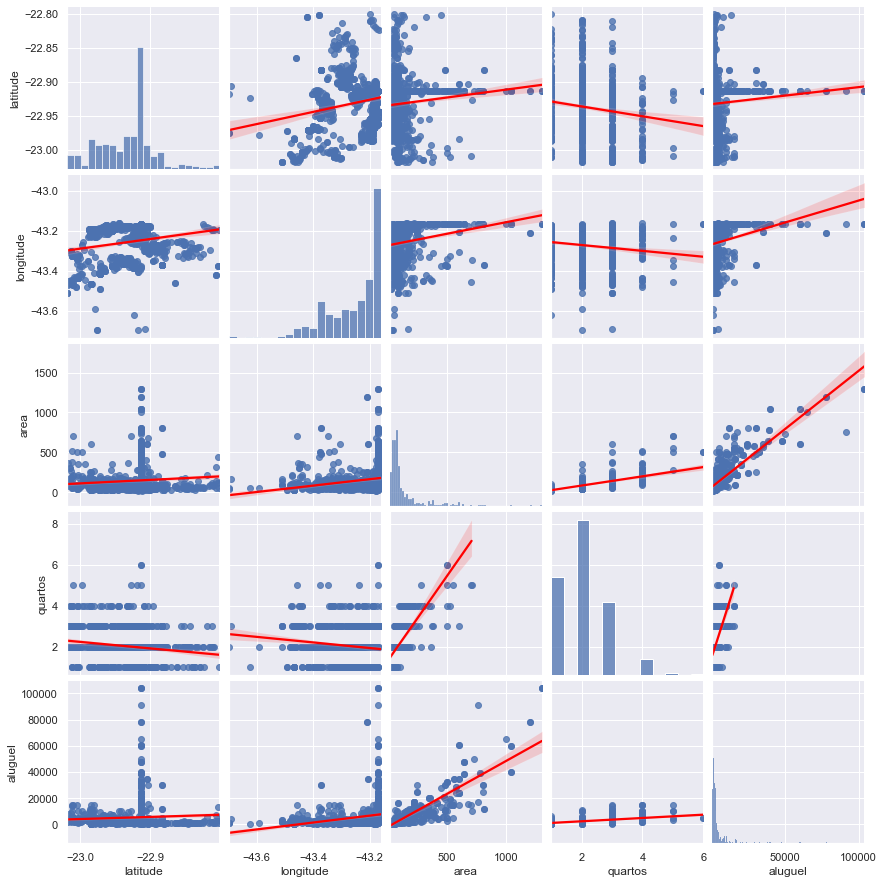

In [13]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [14]:
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)

<ipython-input-14-e6efbadd8df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['aluguel']=train['aluguel'].apply(np.log1p)
<ipython-input-14-e6efbadd8df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['area']=train['area'].apply(np.log1p)


In [15]:
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

<ipython-input-15-9818456c3c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['aluguel']=test['aluguel'].apply(np.log1p)
<ipython-input-15-9818456c3c97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['area']=test['area'].apply(np.log1p)


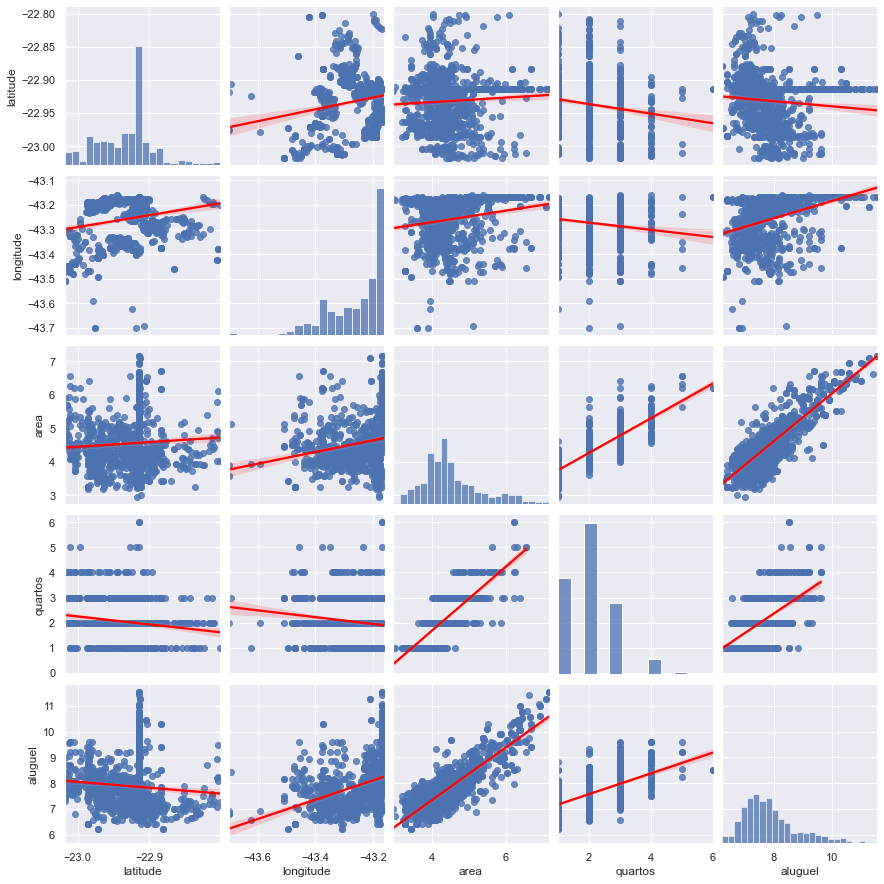

In [16]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [17]:
X_cols = ['zona', 'latitude', 'longitude', 'area', 'quartos']
#X_cols = ['zona', 'area', 'quartos']
y_col = ['aluguel']

In [18]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [19]:
X_train.head()

,zona,latitude,longitude,area,quartos
893,zona-norte,-22.89762,-43.29822,3.931826,1.0
284,centro,-22.91336,-43.16879,7.170120,NaN
49,centro,-22.91353,-43.18043,4.330733,2.0
1276,zona-sul,-22.95067,-43.19280,4.948760,3.0
791,zona-norte,-22.92048,-43.21906,4.465908,2.0


In [20]:
# Tratar colunas categoricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [21]:
X_train.head()

,latitude,longitude,area,quartos,zona_centro,zona_zona-norte,zona_zona-oeste,zona_zona-sul
893,-22.89762,-43.29822,3.931826,1.0,0,1,0,0
284,-22.91336,-43.16879,7.170120,NaN,1,0,0,0
49,-22.91353,-43.18043,4.330733,2.0,1,0,0,0
1276,-22.95067,-43.19280,4.948760,3.0,0,0,0,1
791,-22.92048,-43.21906,4.465908,2.0,0,1,0,0


In [22]:
# Tratar valores ausente
# Importante: Usar informações do conjunto de treino
train_medians = X_train.median()
X_train=X_train.fillna(train_medians)
X_test=X_test.fillna(train_medians)

In [23]:
X_train.head()

,latitude,longitude,area,quartos,zona_centro,zona_zona-norte,zona_zona-oeste,zona_zona-sul
893,-22.89762,-43.29822,3.931826,1.0,0,1,0,0
284,-22.91336,-43.16879,7.170120,2.0,1,0,0,0
49,-22.91353,-43.18043,4.330733,2.0,1,0,0,0
1276,-22.95067,-43.19280,4.948760,3.0,0,0,0,1
791,-22.92048,-43.21906,4.465908,2.0,0,1,0,0


## 2. Machine Learning
### 2.1 Definição de Métrica
Métricas para regressão:
- Mean Absolute Error
- Mean Squared Error
- R2 Score
- Root Mean Squared Error



### 2.2 Modelo Base

In [24]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
y_pred = neigh.predict(X_test)

In [26]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

0.3777459453594127

In [27]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

0.1426919992354764

In [28]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.29585701139263265

In [29]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8311639789111666

## 3. Triagem com Outros Modelos

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.8291507296373531

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9929914402413127
Test score 0.7899731140938996
Treinando RandomForestRegressor


<ipython-input-31-61f5f9d552ee>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


Train score 0.979468849630525
Test score 0.8771566285427412
Treinando MLPRegressor


C:\Users\Lipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lipe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score 0.8068963633372467
Test score 0.8146901849130548
Treinando XGBRegressor
Train score 0.9858271860422979
Test score 0.8829853217709748


In [32]:
len(X_train)//3

336

In [33]:
X1=X_train[:336]
X2=X_train[336:2*336]
X3=X_train[2*336:]

In [34]:
# Repetindo com validação cruzada
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=3)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9929914402413127
Validation score [0.76618672 0.8312346  0.79533583]
Test score 0.7799133832616388
Treinando RandomForestRegressor
Train score 0.9791667905381584
Validation score [0.84763621 0.88147069 0.86677629]
Test score 0.8738754835220633
Treinando MLPRegressor
Train score 0.7716042990218865
Validation score [0.79748021 0.78969114 0.81443161]
Test score 0.7769400860340026
Treinando XGBRegressor
Train score 0.9858271860422979
Validation score [0.8342775  0.86289873 0.85895604]
Test score 0.8829853217709748


In [35]:
# Calibração de modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8,9],
             'n_estimators':[50, 100, 150, 151, 152, 153, 154, 155, 160, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [36]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 151}

In [37]:
reg = gs.best_estimator_

In [38]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.9687153506430963
Validation score [0.85344671 0.87763306 0.8712658 ]
Test score 0.8879939948180623


In [39]:
preds = reg.predict(X_test)

In [40]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.307672


In [41]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

MAE: 0.229830


In [42]:
#R2 - Desnecessário pois foi a métrica usada na calibração do estimador
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)
print("R2: %f" % (r2))

R2: 0.887994


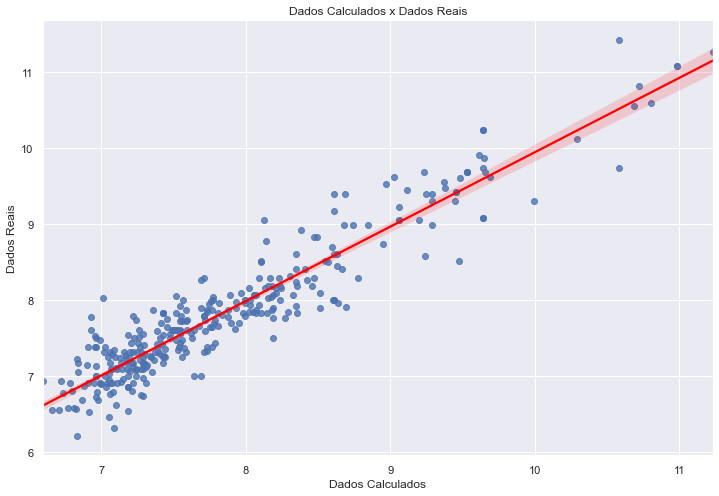

In [43]:
# Comparando dados calculados x dados reais
plt.subplots(figsize=(12,8))
sns.regplot(list(preds), y_test.aluguel.tolist(), line_kws={"color": "red"})
plt.xlabel("Dados Calculados")
plt.ylabel("Dados Reais")
plt.title("Dados Calculados x Dados Reais")
plt.show()

In [44]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

## and later you can load it
#with open('filename.pkl', 'rb') as f:
#    clf = pickle.load(f)

In [45]:
y_pred_train = reg.predict(X_train)

In [46]:
np.expm1(y_train[:5])

,aluguel
893,860.0
284,103929.0
49,1700.0
1276,4270.0
791,2300.0


In [47]:
np.expm1(y_pred_train[:5])

array([   948.5639, 100929.96  ,   1905.1125,   4501.877 ,   2128.2075],
      dtype=float32)

### Testes com CatBootRegressor

In [48]:
# Calibração de modelo CatBoost
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8,9],
             'n_estimators':[50, 100, 150, 151, 152, 153, 154, 155, 160, 200]}]
            
ctb = CatBoostRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(ctb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_train, y_train)

0:	learn: 0.8387985	total: 149ms	remaining: 29.7s
1:	learn: 0.7270456	total: 155ms	remaining: 15.3s
2:	learn: 0.6388519	total: 160ms	remaining: 10.5s
3:	learn: 0.5749397	total: 165ms	remaining: 8.09s
4:	learn: 0.5205091	total: 171ms	remaining: 6.65s
5:	learn: 0.4801927	total: 176ms	remaining: 5.7s
6:	learn: 0.4463339	total: 182ms	remaining: 5.01s
7:	learn: 0.4198199	total: 187ms	remaining: 4.49s
8:	learn: 0.4014408	total: 194ms	remaining: 4.11s
9:	learn: 0.3869606	total: 199ms	remaining: 3.77s
10:	learn: 0.3748837	total: 204ms	remaining: 3.5s
11:	learn: 0.3649169	total: 210ms	remaining: 3.29s
12:	learn: 0.3581170	total: 215ms	remaining: 3.09s
13:	learn: 0.3523089	total: 222ms	remaining: 2.95s
14:	learn: 0.3470379	total: 228ms	remaining: 2.82s
15:	learn: 0.3432851	total: 234ms	remaining: 2.69s
16:	learn: 0.3404920	total: 237ms	remaining: 2.55s
17:	learn: 0.3371035	total: 242ms	remaining: 2.45s
18:	learn: 0.3348078	total: 249ms	remaining: 2.37s
19:	learn: 0.3318982	total: 254ms	remaining

169:	learn: 0.1800255	total: 1.05s	remaining: 186ms
170:	learn: 0.1795122	total: 1.06s	remaining: 179ms
171:	learn: 0.1788372	total: 1.06s	remaining: 173ms
172:	learn: 0.1782724	total: 1.07s	remaining: 167ms
173:	learn: 0.1777180	total: 1.07s	remaining: 160ms
174:	learn: 0.1773746	total: 1.08s	remaining: 154ms
175:	learn: 0.1769067	total: 1.08s	remaining: 148ms
176:	learn: 0.1764248	total: 1.09s	remaining: 142ms
177:	learn: 0.1757223	total: 1.09s	remaining: 135ms
178:	learn: 0.1757026	total: 1.1s	remaining: 129ms
179:	learn: 0.1756857	total: 1.1s	remaining: 122ms
180:	learn: 0.1754807	total: 1.1s	remaining: 116ms
181:	learn: 0.1751675	total: 1.11s	remaining: 110ms
182:	learn: 0.1749302	total: 1.12s	remaining: 104ms
183:	learn: 0.1742686	total: 1.12s	remaining: 97.6ms
184:	learn: 0.1734675	total: 1.13s	remaining: 91.4ms
185:	learn: 0.1727595	total: 1.13s	remaining: 85.3ms
186:	learn: 0.1721048	total: 1.14s	remaining: 79.2ms
187:	learn: 0.1716254	total: 1.14s	remaining: 73ms
188:	learn: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000214AB86CFD0>,
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [50, 100, 150, 151, 152, 153, 154,
                                           155, 160, 200]}],
             scoring='r2')

In [49]:
gs.best_params_

{'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200}

In [50]:
ctb_reg = gs.best_estimator_

In [51]:
train_score = ctb_reg.score(X_train, y_train)
val_score = cross_val_score(ctb_reg, X_train, y_train, cv=3)
test_score = ctb_reg.score(X_test, y_test)

0:	learn: 0.8479403	total: 6.56ms	remaining: 1.3s
1:	learn: 0.7339047	total: 11.6ms	remaining: 1.15s
2:	learn: 0.6537531	total: 13.6ms	remaining: 890ms
3:	learn: 0.5830516	total: 18.6ms	remaining: 912ms
4:	learn: 0.5312304	total: 23.9ms	remaining: 932ms
5:	learn: 0.4871518	total: 28.9ms	remaining: 936ms
6:	learn: 0.4517601	total: 35.9ms	remaining: 991ms
7:	learn: 0.4249735	total: 42ms	remaining: 1.01s
8:	learn: 0.4053117	total: 48.5ms	remaining: 1.03s
9:	learn: 0.3886473	total: 53.2ms	remaining: 1.01s
10:	learn: 0.3768915	total: 58.1ms	remaining: 999ms
11:	learn: 0.3664979	total: 63.3ms	remaining: 991ms
12:	learn: 0.3594612	total: 64.6ms	remaining: 930ms
13:	learn: 0.3541445	total: 69.6ms	remaining: 924ms
14:	learn: 0.3485224	total: 75.5ms	remaining: 932ms
15:	learn: 0.3439930	total: 81.8ms	remaining: 940ms
16:	learn: 0.3403656	total: 84.6ms	remaining: 910ms
17:	learn: 0.3367653	total: 89.3ms	remaining: 903ms
18:	learn: 0.3339266	total: 94.7ms	remaining: 903ms
19:	learn: 0.3311400	tota

175:	learn: 0.1619759	total: 906ms	remaining: 124ms
176:	learn: 0.1612828	total: 911ms	remaining: 118ms
177:	learn: 0.1603563	total: 917ms	remaining: 113ms
178:	learn: 0.1585991	total: 922ms	remaining: 108ms
179:	learn: 0.1581742	total: 928ms	remaining: 103ms
180:	learn: 0.1575316	total: 934ms	remaining: 98.1ms
181:	learn: 0.1573935	total: 939ms	remaining: 92.9ms
182:	learn: 0.1571218	total: 944ms	remaining: 87.7ms
183:	learn: 0.1561612	total: 948ms	remaining: 82.5ms
184:	learn: 0.1553736	total: 953ms	remaining: 77.3ms
185:	learn: 0.1548711	total: 958ms	remaining: 72.1ms
186:	learn: 0.1541436	total: 964ms	remaining: 67ms
187:	learn: 0.1537978	total: 969ms	remaining: 61.8ms
188:	learn: 0.1530858	total: 974ms	remaining: 56.7ms
189:	learn: 0.1525668	total: 979ms	remaining: 51.5ms
190:	learn: 0.1521082	total: 983ms	remaining: 46.3ms
191:	learn: 0.1508865	total: 989ms	remaining: 41.2ms
192:	learn: 0.1504452	total: 994ms	remaining: 36ms
193:	learn: 0.1500118	total: 999ms	remaining: 30.9ms
19

141:	learn: 0.1729940	total: 721ms	remaining: 295ms
142:	learn: 0.1719963	total: 726ms	remaining: 289ms
143:	learn: 0.1712236	total: 731ms	remaining: 284ms
144:	learn: 0.1706226	total: 736ms	remaining: 279ms
145:	learn: 0.1704084	total: 741ms	remaining: 274ms
146:	learn: 0.1700768	total: 747ms	remaining: 269ms
147:	learn: 0.1694609	total: 752ms	remaining: 264ms
148:	learn: 0.1686904	total: 757ms	remaining: 259ms
149:	learn: 0.1685541	total: 762ms	remaining: 254ms
150:	learn: 0.1681748	total: 767ms	remaining: 249ms
151:	learn: 0.1675615	total: 772ms	remaining: 244ms
152:	learn: 0.1671379	total: 777ms	remaining: 239ms
153:	learn: 0.1665915	total: 783ms	remaining: 234ms
154:	learn: 0.1661041	total: 786ms	remaining: 228ms
155:	learn: 0.1647480	total: 791ms	remaining: 223ms
156:	learn: 0.1644441	total: 796ms	remaining: 218ms
157:	learn: 0.1639572	total: 799ms	remaining: 212ms
158:	learn: 0.1631960	total: 804ms	remaining: 207ms
159:	learn: 0.1624718	total: 809ms	remaining: 202ms
160:	learn: 

108:	learn: 0.2052599	total: 544ms	remaining: 454ms
109:	learn: 0.2043540	total: 549ms	remaining: 449ms
110:	learn: 0.2036189	total: 554ms	remaining: 444ms
111:	learn: 0.2031317	total: 559ms	remaining: 439ms
112:	learn: 0.2030186	total: 564ms	remaining: 434ms
113:	learn: 0.2027949	total: 569ms	remaining: 429ms
114:	learn: 0.2021800	total: 574ms	remaining: 424ms
115:	learn: 0.2021030	total: 578ms	remaining: 419ms
116:	learn: 0.2016636	total: 584ms	remaining: 414ms
117:	learn: 0.2010758	total: 590ms	remaining: 410ms
118:	learn: 0.2000938	total: 595ms	remaining: 405ms
119:	learn: 0.1988953	total: 601ms	remaining: 401ms
120:	learn: 0.1982048	total: 606ms	remaining: 396ms
121:	learn: 0.1973243	total: 611ms	remaining: 391ms
122:	learn: 0.1966300	total: 616ms	remaining: 385ms
123:	learn: 0.1954716	total: 621ms	remaining: 380ms
124:	learn: 0.1947099	total: 627ms	remaining: 376ms
125:	learn: 0.1946560	total: 632ms	remaining: 371ms
126:	learn: 0.1938861	total: 639ms	remaining: 367ms
127:	learn: 

In [52]:
ctb_pred = ctb_reg.predict(X_test)

In [53]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ctb_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.299037


In [54]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, ctb_pred)
print("MAE: %f" % (mae))

MAE: 0.225812


In [55]:
#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ctb_pred)
print("R2: %f" % (r2))

R2: 0.894193


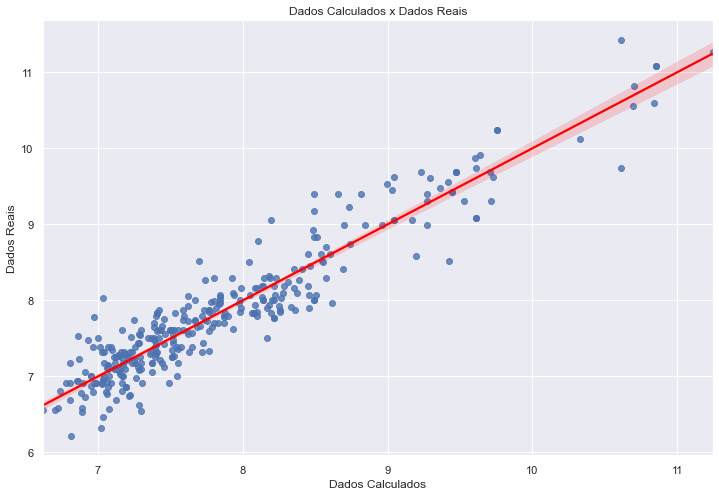

In [56]:
# Comparando dados calculados x dados reais
plt.subplots(figsize=(12,8))
sns.regplot(list(ctb_pred), y_test.aluguel.tolist(), line_kws={"color": "red"})
plt.xlabel("Dados Calculados")
plt.ylabel("Dados Reais")
plt.title("Dados Calculados x Dados Reais")
plt.show()

In [57]:
y_ctb_pred_train = ctb_reg.predict(X_train)

In [58]:
np.expm1(y_train[:5])

,aluguel
893,860.0
284,103929.0
49,1700.0
1276,4270.0
791,2300.0


In [59]:
np.expm1(y_ctb_pred_train[:5])

array([   937.9699601 , 100479.88543886,   2124.1813844 ,   4437.70670008,
         2099.71063836])